In [1]:
import json
import numpy as np
import pandas as pd
import csv
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score


In [2]:
data = pd.read_pickle("synergy_carry_value_df_encoded.pkl")

In [4]:
data_train, data_test = train_test_split(data,shuffle=True,random_state=6453,test_size=.2)

In [21]:
features = list(data.columns)[:-5]
avg_roc = []
avg_acc = []
kfold = KFold(n_splits=5, shuffle = True, random_state=6453)
for i in range(1,15):
    temp_roc = []
    temp_acc = []
    for train_index, validate_index in kfold.split(data_train):
        data_train_train = data_train.iloc[train_index,:]
        data_train_val = data_train.iloc[validate_index,:]
        
        tree_clf = DecisionTreeClassifier(max_depth = i, random_state = 12345)
        X = data_train_train[features]
        tree_clf.fit(X, data_train_train["Top 4"])
        Y_tree = tree_clf.predict(data_train_val[features])
        Y_tree_proba = tree_clf.predict_proba(data_train_val[features])
        
        temp_acc.append(accuracy_score(Y_tree, data_train_val["Top 4"]))
        temp_roc.append(roc_auc_score(data_train_val["Top 4"], Y_tree_proba[:,1]))
    
    avg_roc.append(np.average(temp_roc))
    avg_acc.append(np.average(temp_acc))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


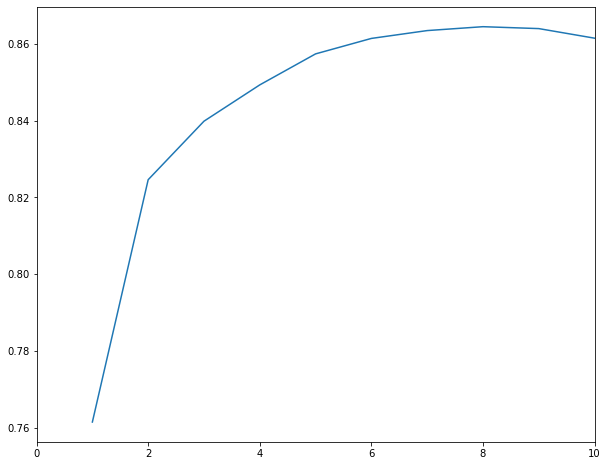

In [23]:
## Examine the results of the cross-validation here
plt.figure(figsize=(10,8))
plt.plot(range(1,15), avg_roc)

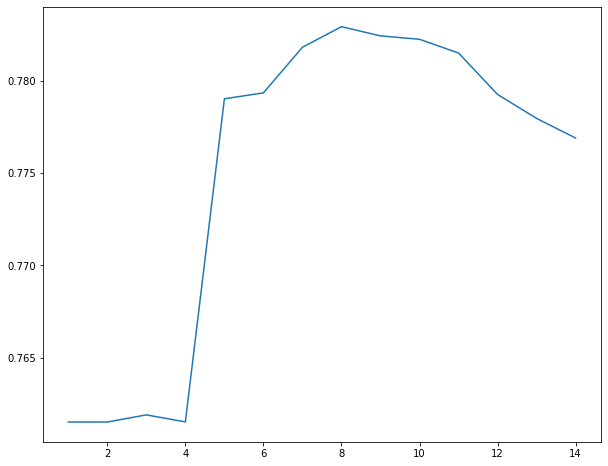

In [25]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), avg_acc)

In [27]:
features = list(data.columns)[:-5]
avg_roc = []
avg_acc = []
kfold = KFold(n_splits=5, shuffle = True, random_state=6453)
for n in [10, 50, 100, 250, 500, 1000]:
    temp_roc = []
    temp_acc = []
    forest = RandomForestClassifier(n_estimators=n, max_depth=8, random_state=12345)
    for train_index, validate_index in kfold.split(data_train):
        data_train_train = data_train.iloc[train_index,:]
        data_train_val = data_train.iloc[validate_index,:]
        
        X = data_train_train[features]
        forest.fit(X, data_train_train["Top 4"])
        Y_forest = forest.predict(data_train_val[features])
        Y_forest_proba = forest.predict_proba(data_train_val[features])
        
        temp_acc.append(accuracy_score(data_train_val["Top 4"], Y_forest))
        temp_roc.append(roc_auc_score(data_train_val["Top 4"], Y_forest_proba[:,1]))
    
    avg_roc.append(np.average(temp_roc))
    avg_acc.append(np.average(temp_acc))
    print(n)
    print(temp_acc)
    print(temp_roc)

10
[0.7731301705216951, 0.7716950869491812, 0.7716010299269764, 0.7773416065172428, 0.775864252247689]
[0.8435882368555936, 0.8434841192165811, 0.8383448840560659, 0.8445940745316666, 0.8419821824772717]
50
[0.7826692554448759, 0.7772665878777646, 0.7818580895698789, 0.7801274745684015, 0.7784812798108987]
[0.8602552461736325, 0.8592584801292633, 0.8569181983395425, 0.8557262211502266, 0.8565587399693319]
100
[0.7793347965557994, 0.7762113793685632, 0.7818158794478917, 0.7790722215187202, 0.7751044700519184]
[0.859915779024427, 0.8609027128403807, 0.8586112173440679, 0.8569809991272535, 0.858254563955817]
250
[0.7810231301705217, 0.7757048792841466, 0.7816048288379553, 0.7787767506648094, 0.7756532016377528]
[0.8612076625873338, 0.8606813627211667, 0.8611242287887627, 0.858295214518465, 0.8590767516271284]
500
[0.7802211717035287, 0.7747340874556813, 0.7809294668861593, 0.779874213836478, 0.7751044700519184]
[0.8622671964520083, 0.8603204426275513, 0.861514392890447, 0.8603594887413137

KeyboardInterrupt: 

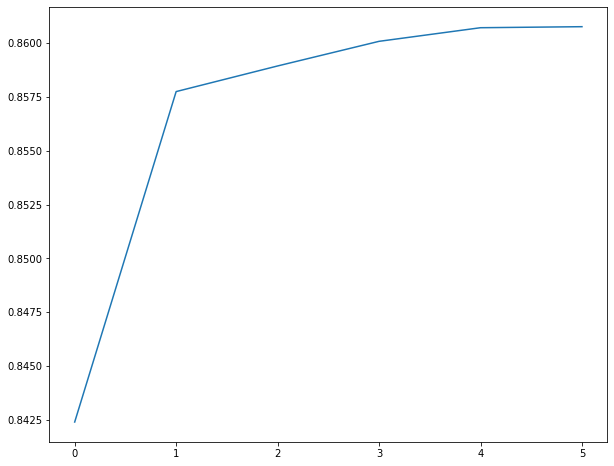

In [28]:
## examine the results here
plt.figure(figsize=(10,8))
plt.plot(range(0,6), avg_roc)

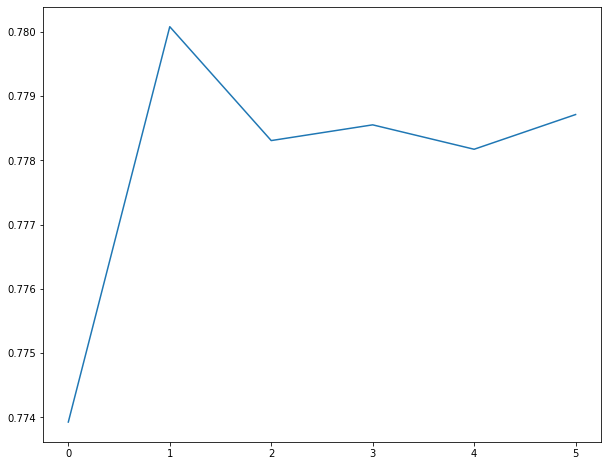

In [29]:
plt.figure(figsize=(10,8))
plt.plot(range(0,6), avg_acc)

In [31]:
features = list(data.columns)[:-5]
forest = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=12345)
kfold = KFold(n_splits=5, shuffle = True, random_state=6453)
temp_roc = []
temp_acc = []
for train_index, validate_index in kfold.split(data_train):
    data_train_train = data_train.iloc[train_index,:]
    data_train_val = data_train.iloc[validate_index,:]

    X = data_train_train[features]
    forest.fit(X, data_train_train["Top 4"])
    Y_forest = forest.predict(data_train_val[features])
    Y_forest_proba = forest.predict_proba(data_train_val[features])

    temp_acc.append(accuracy_score(data_train_val["Top 4"], Y_forest))
    temp_roc.append(roc_auc_score(data_train_val["Top 4"], Y_forest_proba[:,1]))

print(np.average(temp_acc))
print(np.average(temp_roc))

0.7783077493885787
0.8589330544583891
